# Visualizing Distributions

1. Import the required libraries.

In [34]:
import pandas
import numpy
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [35]:
warnings.filterwarnings('ignore')

2. Set global plot style to ggplot.

In [36]:
plt.style.use('ggplot')

3. Download the dataset.

* <b>About: </b> The dataset contains the daily recordings of seattle weather conditions like- precipitatin levels, wind speed, weather type, maximum and minimum temperature from 2012-2015.

* <b>Source: </b> vega_datasets library.

In [37]:
df = data.seattle_weather()

4. Explore the dataset.

In [38]:
df.shape

(1461, 6)

In [39]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [40]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

* **Summary Statistics:**

In [41]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


# Plot 1: Histogram and Density plot

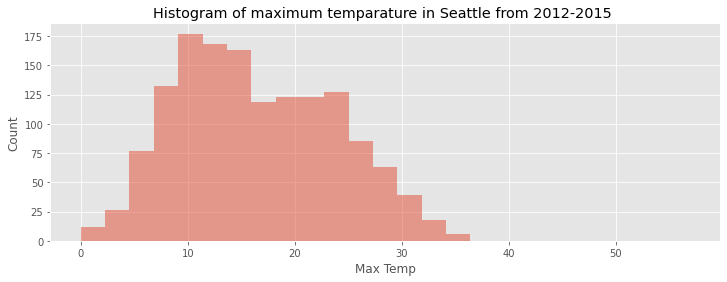

In [42]:
# set the histogram

fig,axes=plt.subplots()
fig.set_figwidth(10)
fig.set_figwidth(12)

plt.hist(df.temp_max, 
         range=(df.precipitation.min(),
                df.precipitation.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel('Max Temp') 
plt.ylabel('Count') 
plt.title('Histogram of maximum temparature in Seattle from 2012-2015 ') 
plt.show()

* Let's decrease the bins

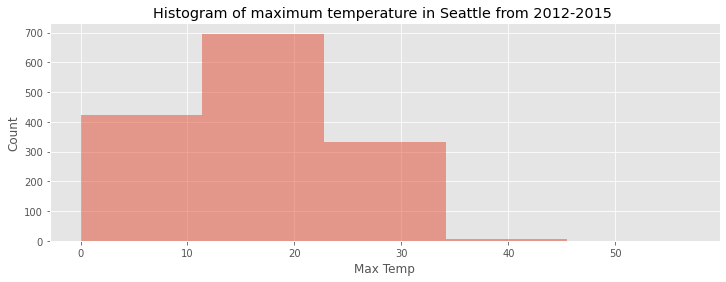

In [61]:
fig,axes=plt.subplots()
fig.set_figwidth(10)
fig.set_figwidth(12)

plt.hist(df.temp_max, 
         range=(df.precipitation.min(),
                df.precipitation.max()+1), 
         bins=5, 
         alpha=0.5) 
# set title and labels
plt.xlabel('Max Temp') 
plt.ylabel('Count') 
plt.title('Histogram of maximum temperature in Seattle from 2012-2015 ') 
plt.show()

* Let's increase the bins

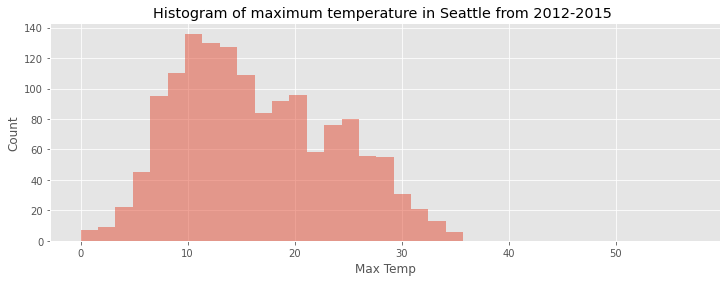

In [64]:
fig,axes=plt.subplots()
fig.set_figwidth(10)
fig.set_figwidth(12)

plt.hist(df.temp_max, 
         range=(df.precipitation.min(),
                df.precipitation.max()+1), 
         bins=35, 
         alpha=0.5) 
# set title and labels
plt.xlabel('Max Temp') 
plt.ylabel('Count') 
plt.title('Histogram of maximum temperature in Seattle from 2012-2015 ') 
plt.show()

* **Density Plot**

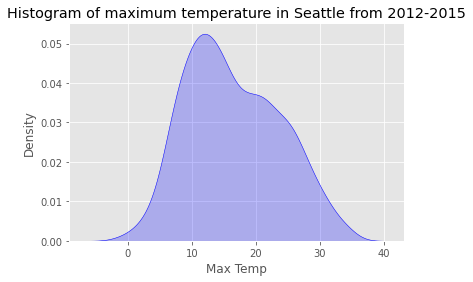

In [44]:
ax = sns.kdeplot(df.temp_max, shade=True, color='b') 
plt.title('Histogram of maximum temperature in Seattle from 2012-2015'); 
plt.ylabel('Density');
plt.xlabel('Max Temp');

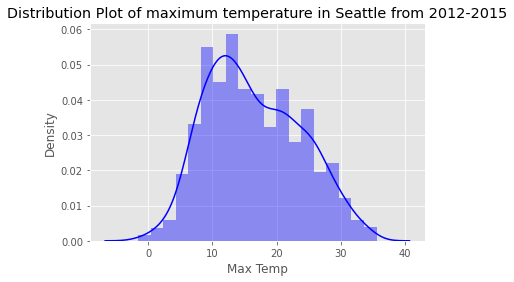

In [45]:
ax = sns.distplot(df.temp_max, hist=True, color='b')
plt.title('Distribution Plot of maximum temperature in Seattle from 2012-2015'); 
plt.ylabel('Density');
plt.xlabel('Max Temp');

* **Interpretation:** 

  * From the above plots, we can see that on most days the maximum temperature in Seattle was between 10-22 Celsius.
  * From our experiments, we can see how having an optimal number of bins for a histogram would help us understand the distribution in a better way. A density overlapped on a histogram is more efficient in the understanding the underlying distribution of data.

# Plot 2: Density plot of two or more categories.

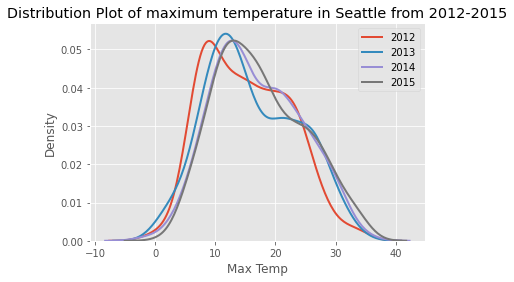

In [59]:
years=[2012,2013,2014,2015]

for year in years: 
   subset = df[df['date'].dt.year==year]
   sns.kdeplot(subset['temp_max'], label=year, linewidth=2,fill=False) 
  


plt.title('Distribution Plot of maximum temperature in Seattle from 2012-2015') 
plt.ylabel('Density'); 
plt.xlabel('Max Temp');
plt.legend();

* From the above plot, we can see that the shape of the distribution of Maximum Temperature from 2012-2015 is almost the same. We can also infer that the summary statistics for all the distributions would be close.

* Overlapping density plots is more efficient than overlapping histograms for comparing the distributions of more than one category.

# Plot 3: Box plot

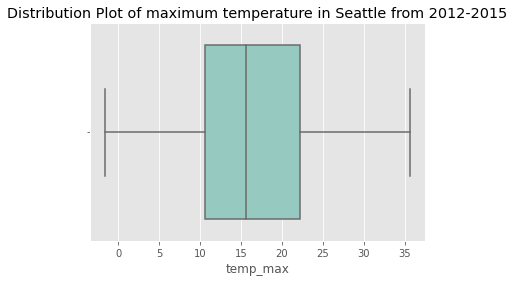

In [53]:
sns.boxplot(x='temp_max', data=df, palette='Set3') 
plt.title('Distribution Plot of maximum temperature in Seattle from 2012-2015'); 


In [50]:
df['year']=df['date'].dt.year

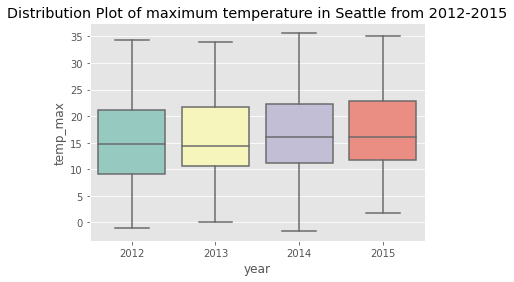

In [52]:
sns.boxplot(x='year', y='temp_max', data=df,
            palette='Set3') 
plt.title('Distribution Plot of maximum temperature in Seattle from 2012-2015'); 


**Interpretation:** 

* From the first box plot, we can see that the quartile levels of maximum temperature is same as the summary statistics generated above. 

* The second box plot shows how the summary statistics of each are close enough.

# Plot 4: Boxen plot

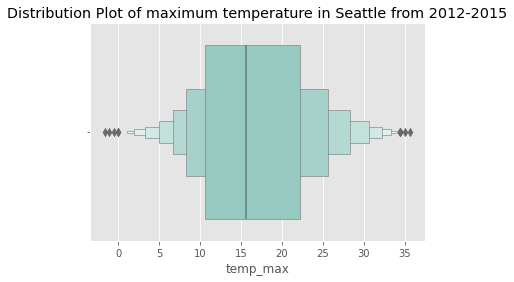

In [54]:
sns.boxenplot(x='temp_max', data=df,palette='Set3') 
plt.title('Distribution Plot of maximum temperature in Seattle from 2012-2015'); 


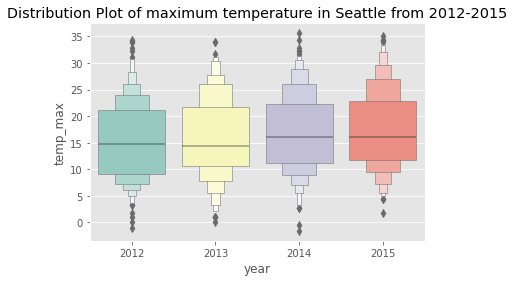

In [55]:
sns.boxenplot(x='year', y='temp_max', data=df,
            palette='Set3') 


plt.title('Distribution Plot of maximum temperature in Seattle from 2012-2015'); 


**Interpretation:**
  * From the above plots, we can see that unlike box plots, boxen plots give some clue regrading the shape of the distribution- A lighter shade corresponds to low density, while a darker shade corresponds to high density.

  * The diamond shaped points indicate the outliers in each distribution.

# Plot 5: Violin plot

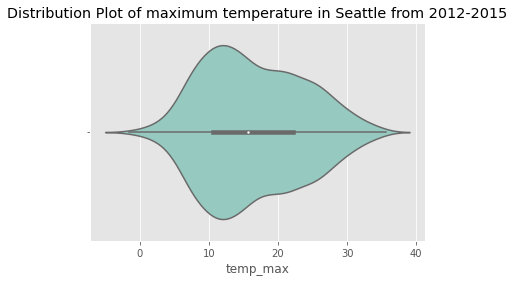

In [56]:
sns.violinplot(x='temp_max', data=df,palette='Set3') 
plt.title('Distribution Plot of maximum temperature in Seattle from 2012-2015'); 


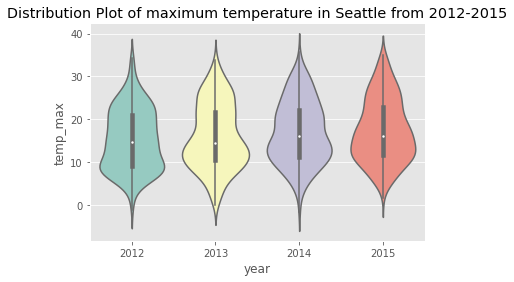

In [57]:
sns.violinplot(x='year', y='temp_max', data=df,
            palette='Set3') 


plt.title('Distribution Plot of maximum temperature in Seattle from 2012-2015'); 

**Interpretation:**
  * From the above plots we can see that violin plots are efficient in giving two perspectives on data distribution- shape and summary statistics.
  * We can also enhance our violin plot to get details about outliers by overlapping a strip plot.  

**Conclusion:** 

  * A density plot overlapped on a histogram is more efficient in understanding the shape of the underlying distribution of data. 
  * When we want to compare the shape of distributions of more than one category, it's efficient to use overlapped density plots.
  * When we just want to compare the summary statistics of more than one distribution, then it's efficient to use a box plot.
  * Unlike box plots, the boxen plots give clues regrading the shape of the underlying distribution.
  * Violin plots are efficient in analyzing both the shape and summary statistics of a distribution.